# Building our Recurrent Neural Network - Step by Step
- We'll be implementing key components of a Recurrent Neural Network or RNN.
- We'll be able to : 
    - Define notation for building sequence models
    - Describe the architecture of a basic RNN
    - Identify the main components of an LSTM
    - Implement backpropagation through time for a basic RNN and an LSTM
    - Give examples of several types of RNN.
- RNN are very effective for Natural Language Processing and other sequence tasks becuase they have 'memory'. They can read inputs x^t one at a time, and remember some contextual information through the hidden layer activations that get passed from one time step to the next. This allows a unidirectional (one-way) RNN to take information from the past to process later inputs. A bidirectional (2 way) RNN can take context from both past and the future.

### Notation
- Superscript [l] denotes an object asssociated with the lth layer.
- Superscript (i) denotes an object associated with the ith example.
- Superscript $\langle t \rangle$  denotes an obbject at the ith time step.
- Subscript i denotes the ith entry of a vector.
- Example : $a^{(2)[3]<4>}_5$ denotes the activation of the end training example (2), 3rd layer [3], 4th time step <4>, and 5th entry in the vector

# Packages

In [1]:
import numpy as np

# 1. Forward Propagation for the Basic Recurrent Neural Network
- The basic RNN that we'll implement has the following structure :
- In this example. T_x = T_y
- 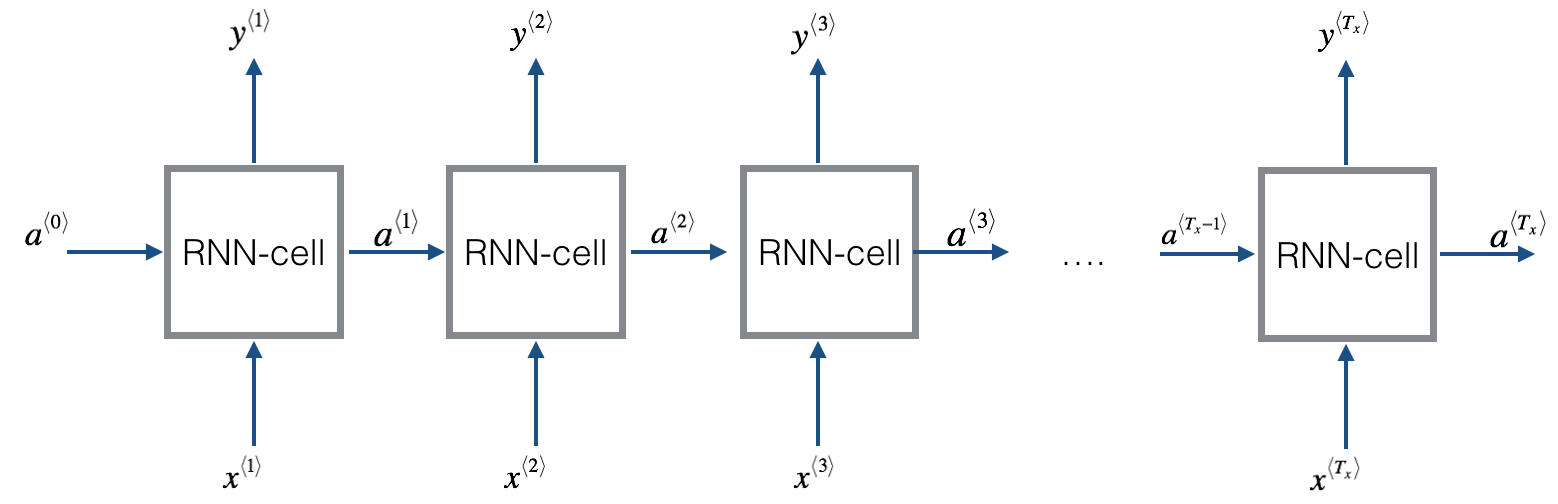

## Dimensions of input x
### Input with n_x number of units
- For a single time step of a single input example,  $x^{(i) \langle t \rangle }$ is one-dimensional input vector.
- Using language as an example, a language with a 5000-word vocabulary could be one-hot encoded into a vector that has 5000 units. So $x^{(i)\langle t \rangle}$ would have the shape (5000,)
- The notation n_x is used here to denote the number of units in a single time step of a single training example
### Time steps of size T_x
- A recurrent neural network has multiple time steps, which we'll index with t.
- A single training examples x^(i) consisting of multiple time steps T_x. T_x will denote the number of timesteps in the longest sequence.
### Batches of size m
- Let's say we have mini-batches, each with 20 training examples.
- To benefit from vectorization, we'll stack 20 columns of x^(i) examples.
- For example, this tensor has the shape (5000, 20, 10)
- We'll use m to denote the number of training examples.
- so the shape of a mini-batch is (n_x, m, T_x)
### 3D Tensor of shape (n_x, m, T_x)
- The 3D tensor x of shape (n_x, m, T_x) represents the input x that is fed into the RNN.
### Taking a 2D slice for each time step : 
- At each time step, we'll use a mini-batch of training examples (not just a single example)
- So, for each time step t, we'll use a 2D slice of shape (n_x, m)
- This 2D slice is referred to as $x^{\langle t \rangle}$. The variable name in the code is xt.

## Definition of hidden state a
- The activation $a^{\langle t \rangle}$ that is passed to the RNN from one time step to another is called a 'hidden state.'
### Dimensions of hidden state a
- Similar to the input tensor x, the hidden state for a single training example is a vector of lenght n_a
- If we include a mini-batch of m training examples, the shape of a mini-batch is (n_a, m)
- When we include the time step dimension, the shape of the hidden state is (n_a, m, T_x)
- We'll loop through the time steps with index t, and work with a 2D slice of the 3D tensor
- This 2D slice is referred to as $a^{\langle t \rangle}$
- The variable names used are either a_prev or a_next, depending on the function being implemented
- The shape of this 2D slice is (n_a, m)

## Dimensions of prediction y_hat
- Similar to the inputs and hidden states, y_hat is a 3D tensor of shape (n_y, m, T_y)
    - n_y : Number of units and hidden states, y_hat is a 3D tensor of shape (n_y, m, T_y)
    - m : Number of examples in a mini-batch
    - T_y : Number of time steps in the prediction
- For a single time step t, a 2D slice  $\hat{y}^{\langle t \rangle}$ has shape (n_y, m)
- In the code, the variables names are :
    - y_pred
    - yt_pred

- We can implement an RNN
- Steps :
    1. Implement the calculations needed for one time step of the RNN.
    2. Implement a loop over T_x time steps in order to process all the inputs, one at a time.
    
## 1.1 RNN Cell
- We can think of the recurrent neural network as the repeated use of a single cell. First, We'll implement the computations for a single time step. The following fugure describes the operations for a single time step of an RNN cell.
- 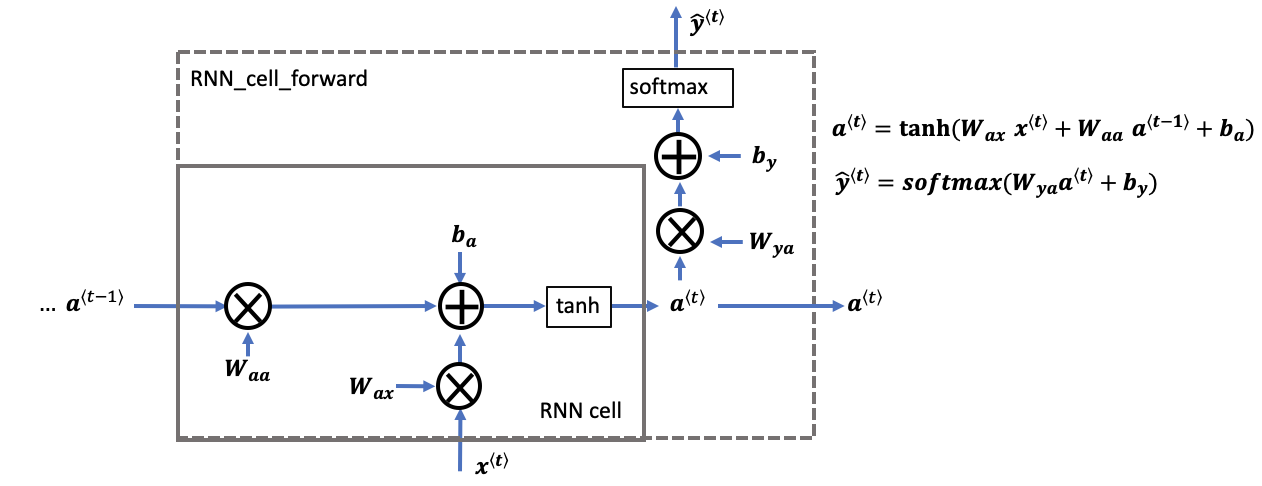

#### RNN cell vs RNN_cell_forward
- An RNN cell outputs the hidden state $a^{\langle t \rangle}$.  
    - RNN cell is shown in the figure as the inner box with solid lines.
- The function that we'll implement rnn_cell_forward, also called the prediction y_t

In [3]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [4]:
def rnn_cell_forward(xt, a_prev, parameters):
    """
    Implements a single forward step of the RNN-cell as described in Figure (2)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, a_prev, xt, parameters)
    """
    
    # Retrieve parameters from "parameters"
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    
    ### START CODE HERE ### (≈2 lines)
    # compute next activation state using the formula given above
    a_next = np.tanh( np.dot(Waa, a_prev) + np.dot(Wax, xt) + ba )
    # compute output of the current cell using the formula given above
    yt_pred = softmax( np.dot( Wya, a_next ) + by )
    ### END CODE HERE ###
    
    # store values you need for backward propagation in cache
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache

In [5]:
np.random.seed(1)
xt_tmp = np.random.randn(3, 10)
a_prev_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Waa'] = np.random.randn(5, 5)
parameters_tmp['Wax'] = np.random.randn(5, 3)
parameters_tmp['Wya'] = np.random.randn(2, 5)
parameters_tmp['ba'] = np.random.randn(5, 1)
parameters_tmp['by'] = np.random.randn(2, 1)

a_next_tmp, yt_pred_tmp, cache_tmp = rnn_cell_forward(xt_tmp, a_prev_tmp, parameters_tmp)
print("a_next[4] = \n", a_next_tmp[4])
print("a_next.shape = \n", a_next_tmp.shape)
print("yt_pred[1] =\n", yt_pred_tmp[1])
print("yt_pred.shape = \n", yt_pred_tmp.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

a_next[4] = 
 [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape = 
 (5, 10)
yt_pred[1] =
 [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 0.88945212
 0.36920224 0.9966312  0.9982559  0.17746526]
yt_pred.shape = 
 (2, 10)


## 1.2 RNN Forward Pass
- A recurrent neural network (RNN) is a repetition of the RNN cell that we've just built.
    - If our input sequence of data is 10 time steps long, then we will re-use the RNN cell 10 times.
- Each cell takes 2 inputs at each time step :
    - $a^{\langle t-1 \rangle}$: The hidden state from the previous cell.
    - $x^{\langle t \rangle}$ : The current time step's input data.
- It has 2 outputs at each time step :
    - A hidden state ($a^{\langle t \rangle}$)
    - A prediction($y^{\langle t \rangle}$)
- The weights and biases (W_aa, W_ax, b_a, W_ay, b_y) are re-used each time step.
    - They are maintained b/w calls to rnn_cell_forward in the parameters dictionary
- 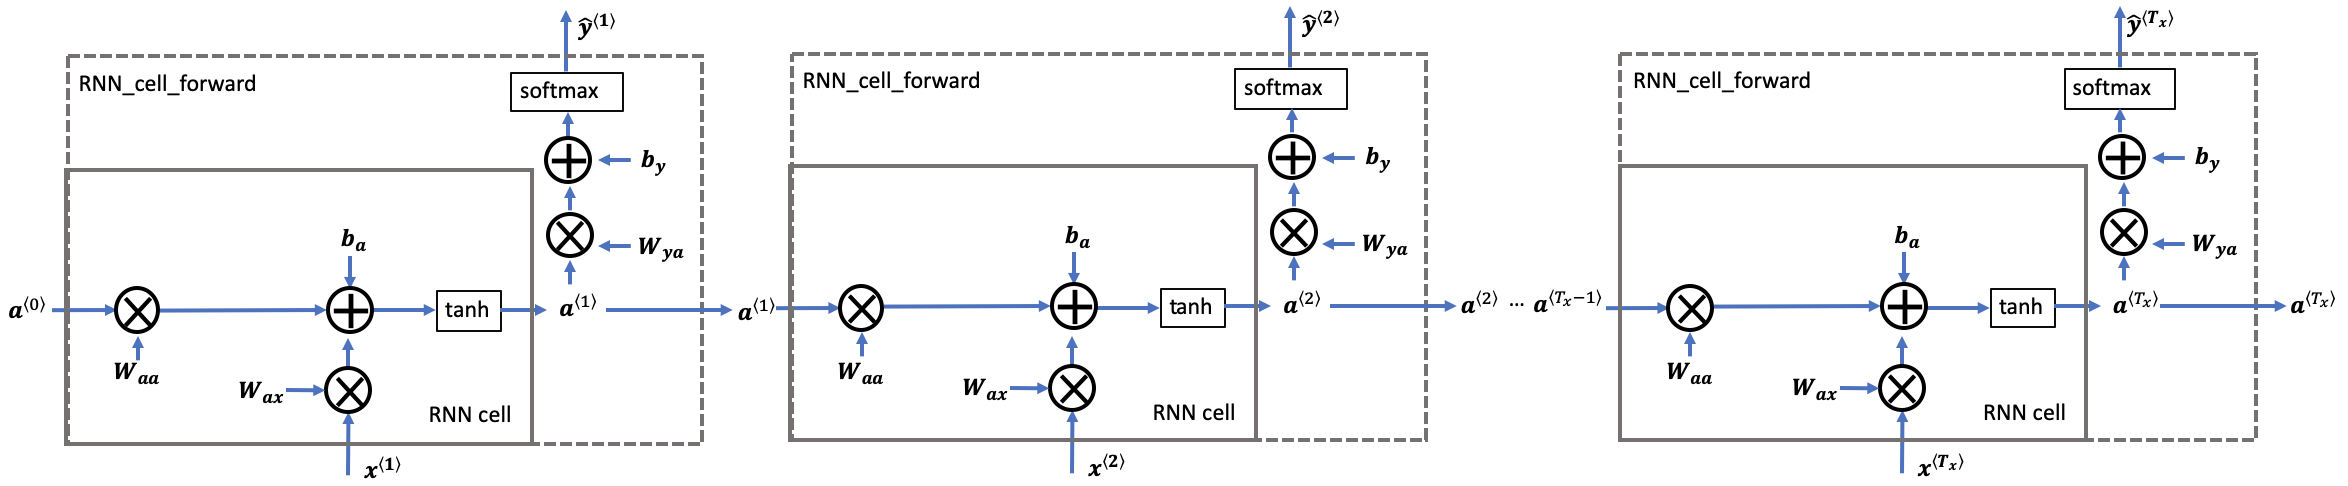

### rnn_forward
- Implement the forward propagation of the RNN
- Create a 3D array of zeros, a of shape (n_a, m, T_x) that will store all the hidden states computed by the RNN
- Create a 3D array of zeros, y_hat of shape (n_y, m, T_x) that will store the predictions.
    - Here, T_x = T_y (the prediction and input have the same numver of time steps)
- Inititilize the 2D hidden state a_next by setting it equal to the initial hidden state a_0
- At each time step t : 
    - Get $x^{\langle t \rangle}$, which is a D slice of x for a single time step t
        - $x^{\langle t \rangle}$ has shape (n_x, m)
        - x has shape (n_x, m, T_x)
    - Update the 2D hidden state $x^{\langle t \rangle}$ (a_next), the prediction $\hat{y}^{\langle t \rangle}$ and the cache by running rnn_cell_forward
        - $a^{\langle t \rangle}$, has shape (n_a, m)
    - Store the 2D hidden state in the 3D tensor a, at the ith position
        - a has shape (n_a, m, T_x)
    - Store the 2D $\hat{y}^{\langle t \rangle}$ prediction (yt_pred) in the 3D tensor $\hat{y}_{pred}$ at the $t^{th}$ position.
        - $\hat{y}^{\langle t \rangle}$ has shape (n_y, m)
        - y_hat has shape (n_y, m, T_x)
    - Append the cache to the list of caches
- Return the 3D tensor a and y_hat, as well as the list of caches

In [6]:
def rnn_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network described in Figure (3).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y_pred -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of caches, x)
    """
    
    # Initialize "caches" which will contain the list of all caches
    caches = []
    
    # Retrieve dimensions from shapes of x and parameters["Wya"]
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape
    
    ### START CODE HERE ###
    
    # initialize "a" and "y_pred" with zeros (≈2 lines)
    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((n_y, m, T_x))
    
    # Initialize a_next (≈1 line)
    a_next = a0
    
    # loop over all time-steps
    for t in range(T_x):
        # Update next hidden state, compute the prediction, get the cache (≈1 line)
        a_next, yt_pred, cache = rnn_cell_forward(x[:, :, t], a_next, parameters)
        # Save the value of the new "next" hidden state in a (≈1 line)
        a[:,:,t] = a_next
        # Save the value of the prediction in y (≈1 line)
        y_pred[:,:,t] = yt_pred
        # Append "cache" to "caches" (≈1 line)
        caches.append(cache)
    ### END CODE HERE ###
    
    # store values needed for backward propagation in cache
    caches = (caches, x)
    
    return a, y_pred, caches

In [7]:
np.random.seed(1)
x_tmp = np.random.randn(3, 10, 4)
a0_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Waa'] = np.random.randn(5, 5)
parameters_tmp['Wax'] = np.random.randn(5, 3)
parameters_tmp['Wya'] = np.random.randn(2, 5)
parameters_tmp['ba'] = np.random.randn(5, 1)
parameters_tmp['by'] = np.random.randn(2, 1)

a_tmp, y_pred_tmp, caches_tmp = rnn_forward(x_tmp, a0_tmp, parameters_tmp)
print("a[4][1] = \n", a_tmp[4][1])
print("a.shape = \n", a_tmp.shape)
print("y_pred[1][3] =\n", y_pred_tmp[1][3])
print("y_pred.shape = \n", y_pred_tmp.shape)
print("caches[1][1][3] =\n", caches_tmp[1][1][3])
print("len(caches) = \n", len(caches_tmp))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

a[4][1] = 
 [-0.99999375  0.77911235 -0.99861469 -0.99833267]
a.shape = 
 (5, 10, 4)
y_pred[1][3] =
 [0.79560373 0.86224861 0.11118257 0.81515947]
y_pred.shape = 
 (2, 10, 4)
caches[1][1][3] =
 [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) = 
 2


- This RNN work well enough for some applications, but it suffers from vanishing gradients.
- The RNN works best when each output $\hat{y}^{\langle t \rangle}$ can be estimated using 'local' context.
- 'Local' context referes to information that is close to the prediction's time step t.
- Local context refers to input $x^{\langle t' \rangle}$ and predictions $\hat{y}^{\langle t \rangle}$ where $t'$ is close to $t$.


Note : 
- The recurent neural network or RNN is essentialy the repeated use of a single cell.
- A basic RNN reads inputs one at a time, and remembers information through the hidden layer activations (hidden states) that are passes from one timtestep to the next.
    - The time step dimension determines how many timnes to re-use the RNN cell.
- Each cell takes 2 inputs at each time step :
    - The hidden state from the previous cell
    - The current time step's input data
- Each cell has 2 outputs at each time step
    - A hidden state
    - A prediction
    
- LSTM, which is better at addressing vanishing gradients. The LSTM is better able to remember a piece of information and save it for many time steps.

# 2. Long Short-Term Memory (LSTM) Network
- The operations of an LSTM cell :
    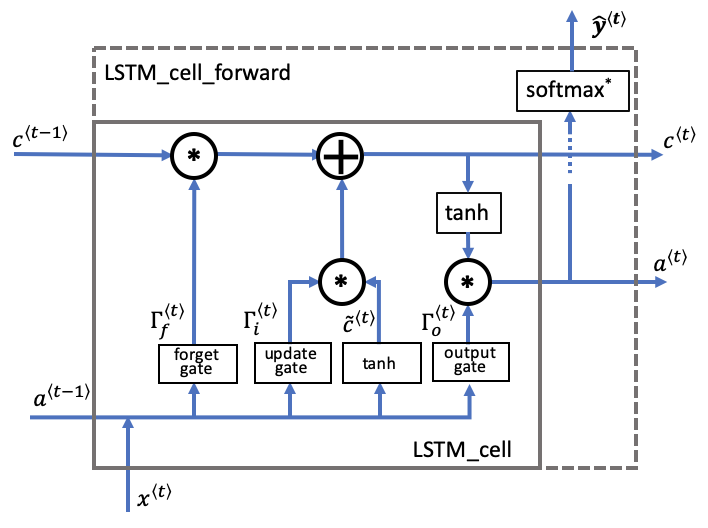
    
## Overview of gates and states
### Forget gate  $\mathbf{\Gamma}_{f}$
- Let's assume we are reading words in a piece of text, and plan to use an LSTM to keep track of grammatical structures, such as whether the subject is singular ('puppy') or plural ('puppies')
- If the subject changes its state (from a singular word to a pular word), the memory of the previous state becomes outdated, so we'll forget that outdated state.
- The 'forget gate' is a tensor containing values b/w 0 and 1.
    - If a unit in the forget gate has a value close to 0, the LSTM will 'forget' the stored state in the corresponding unit of the previous cell state.
    - If a unit in the forget gate has a value close to 1, the LSTM will mostly remember the corresponding value in the stored state.
    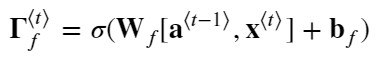
- Explanation 
    - W_f contains weights that govern the forget gate's behavior.
    - The previous time step's hidden state $[a^{\langle t-1 \rangle}$ and current time step's input $a^{\langle t \rangle}$ are concatenated together and multiplied by W_f.
    - A sigmoid function is used to make each of the gate tensor's value $\mathbf{\Gamma}_f^{\langle t \rangle}$ range from 0 to 1.
    - The forget gate $\mathbf{\Gamma}_f^{\langle t \rangle}$ has the same dimensions as the previous cell state $c^{\langle t-1 \rangle}$. 
    - This means that the 2 can be multiplied together, element-wise.
    - Multiplying the tensors $\mathbf{\Gamma}_f^{\langle t \rangle}$ * $c^{\langle t-1 \rangle}$ is like applying a mask over the previous cell state.
    - If a single value in $\mathbf{\Gamma}_f^{\langle t \rangle}$ is 0 or close to 0, then the product is close to 0.
        - This keeps the information stored in the corresponding unit in $c^{\langle t-1 \rangle}$ from being remembered for the next time step.
    - Similarly, if one value is close to 1, the product is close to the original value in the previous cell state.
        - The LSTM will keep the information the corresponding unit of $c^{\langle t-1 \rangle}$, to be used in the next time step.
- Variable names : 
    - Wf : Forget gate weight
    - bf : Forget gate bias
    - ft : forget gate

#### Candidate value $\tilde{\mathbf{c}}^{\langle t \rangle}$
* The candidate value is a tensor containing information from the current time step that **may** be stored in the current cell state $\mathbf{c}^{\langle t \rangle}$.
* The parts of the candidate value that get passed on depend on the update gate.
* The candidate value is a tensor containing values that range from -1 to 1.
* The tilde "~" is used to differentiate the candidate $\tilde{\mathbf{c}}^{\langle t \rangle}$ from the cell state $\mathbf{c}^{\langle t \rangle}$.

##### Equation
$$\mathbf{\tilde{c}}^{\langle t \rangle} = \tanh\left( \mathbf{W}_{c} [\mathbf{a}^{\langle t - 1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{c} \right) \tag{3}$$

##### Explanation of the equation
* The *tanh* function produces values between -1 and 1.


##### Variable names in the code
* `cct`: candidate value $\mathbf{\tilde{c}}^{\langle t \rangle}$

#### Update gate $\mathbf{\Gamma}_{i}$

* You use the update gate to decide what aspects of the candidate $\tilde{\mathbf{c}}^{\langle t \rangle}$ to add to the cell state $c^{\langle t \rangle}$.
* The update gate decides what parts of a "candidate" tensor $\tilde{\mathbf{c}}^{\langle t \rangle}$ are passed onto the cell state $\mathbf{c}^{\langle t \rangle}$.
* The update gate is a tensor containing values between 0 and 1.
    * When a unit in the update gate is close to 1, it allows the value of the candidate $\tilde{\mathbf{c}}^{\langle t \rangle}$ to be passed onto the hidden state $\mathbf{c}^{\langle t \rangle}$
    * When a unit in the update gate is close to 0, it prevents the corresponding value in the candidate from being passed onto the hidden state.
* Notice that the subscript "i" is used and not "u", to follow the convention used in the literature.

##### Equation

$$\mathbf{\Gamma}_i^{\langle t \rangle} = \sigma(\mathbf{W}_i[a^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_i)\tag{2} $$ 

##### Explanation of the equation

* Similar to the forget gate, here $\mathbf{\Gamma}_i^{\langle t \rangle}$, the sigmoid produces values between 0 and 1.
* The update gate is multiplied element-wise with the candidate, and this product ($\mathbf{\Gamma}_{i}^{\langle t \rangle} * \tilde{c}^{\langle t \rangle}$) is used in determining the cell state $\mathbf{c}^{\langle t \rangle}$.

##### Variable names in code (Please note that they're different than the equations)
In the code, you'll use the variable names found in the academic literature.  These variables don't use "u" to denote "update".
* `Wi` is the update gate weight $\mathbf{W}_i$ (not "Wu") 
* `bi` is the update gate bias $\mathbf{b}_i$ (not "bu")
* `it` is the update gate $\mathbf{\Gamma}_i^{\langle t \rangle}$ (not "ut")

#### Output gate $\mathbf{\Gamma}_{o}$

* The output gate decides what gets sent as the prediction (output) of the time step.
* The output gate is like the other gates, in that it contains values that range from 0 to 1.

##### Equation

$$ \mathbf{\Gamma}_o^{\langle t \rangle}=  \sigma(\mathbf{W}_o[\mathbf{a}^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{o})\tag{5}$$ 

##### Explanation of the equation
* The output gate is determined by the previous hidden state $\mathbf{a}^{\langle t-1 \rangle}$ and the current input $\mathbf{x}^{\langle t \rangle}$
* The sigmoid makes the gate range from 0 to 1.


##### Variable names in the code
* `Wo`: output gate weight, $\mathbf{W_o}$
* `bo`: output gate bias, $\mathbf{b_o}$
* `ot`: output gate, $\mathbf{\Gamma}_{o}^{\langle t \rangle}$

#### Hidden state $\mathbf{a}^{\langle t \rangle}$

* The hidden state gets passed to the LSTM cell's next time step.
* It is used to determine the three gates ($\mathbf{\Gamma}_{f}, \mathbf{\Gamma}_{u}, \mathbf{\Gamma}_{o}$) of the next time step.
* The hidden state is also used for the prediction $y^{\langle t \rangle}$.

##### Equation

$$ \mathbf{a}^{\langle t \rangle} = \mathbf{\Gamma}_o^{\langle t \rangle} * \tanh(\mathbf{c}^{\langle t \rangle})\tag{6} $$

##### Explanation of equation
* The hidden state $\mathbf{a}^{\langle t \rangle}$ is determined by the cell state $\mathbf{c}^{\langle t \rangle}$ in combination with the output gate $\mathbf{\Gamma}_{o}$.
* The cell state state is passed through the `tanh` function to rescale values between -1 and 1.
* The output gate acts like a "mask" that either preserves the values of $\tanh(\mathbf{c}^{\langle t \rangle})$ or keeps those values from being included in the hidden state $\mathbf{a}^{\langle t \rangle}$

##### Variable names  and shapes in the code
* `a`: hidden state, including time steps.  $\mathbf{a}$ has shape $(n_{a}, m, T_{x})$
* `a_prev`: hidden state from previous time step. $\mathbf{a}^{\langle t-1 \rangle}$ has shape $(n_{a}, m)$
* `a_next`: hidden state for next time step.  $\mathbf{a}^{\langle t \rangle}$ has shape $(n_{a}, m)$ 

#### Prediction $\mathbf{y}^{\langle t \rangle}_{pred}$
* The prediction in this use case is a classification, so you'll use a softmax.

The equation is:
$$\mathbf{y}^{\langle t \rangle}_{pred} = \textrm{softmax}(\mathbf{W}_{y} \mathbf{a}^{\langle t \rangle} + \mathbf{b}_{y})$$

##### Variable names and shapes in the code
* `y_pred`: prediction, including all time steps. $\mathbf{y}_{pred}$ has shape $(n_{y}, m, T_{x})$.  Note that $(T_{y} = T_{x})$ for this example.
* `yt_pred`: prediction for the current time step $t$. $\mathbf{y}^{\langle t \rangle}_{pred}$ has shape $(n_{y}, m)$

## 2.1 LSTM Cell

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: lstm_cell_forward

def lstm_cell_forward(xt, a_prev, c_prev, parameters):
    """
    Implement a single forward step of the LSTM-cell as described in Figure (4)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    c_prev -- Memory state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wf -- Weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        bf -- Bias of the forget gate, numpy array of shape (n_a, 1)
                        Wi -- Weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        bi -- Bias of the update gate, numpy array of shape (n_a, 1)
                        Wc -- Weight matrix of the first "tanh", numpy array of shape (n_a, n_a + n_x)
                        bc --  Bias of the first "tanh", numpy array of shape (n_a, 1)
                        Wo -- Weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        bo --  Bias of the output gate, numpy array of shape (n_a, 1)
                        Wy -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
                        
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    c_next -- next memory state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, c_next, a_prev, c_prev, xt, parameters)
    
    Note: ft/it/ot stand for the forget/update/output gates, cct stands for the candidate value (c tilde),
          c stands for the cell state (memory)
    """

    # Retrieve parameters from "parameters"
    Wf = parameters["Wf"] # forget gate weight
    bf = parameters["bf"]
    Wi = parameters["Wi"] # update gate weight (notice the variable name)
    bi = parameters["bi"] # (notice the variable name)
    Wc = parameters["Wc"] # candidate value weight
    bc = parameters["bc"]
    Wo = parameters["Wo"] # output gate weight
    bo = parameters["bo"]
    Wy = parameters["Wy"] # prediction weight
    by = parameters["by"]
    
    # Retrieve dimensions from shapes of xt and Wy
    n_x, m = xt.shape
    n_y, n_a = Wy.shape

    ### START CODE HERE ###
    # Concatenate a_prev and xt (≈1 line)
    concat = np.concatenate((a_prev, xt), axis=0)

    # Compute values for ft, it, cct, c_next, ot, a_next using the formulas given figure (4) (≈6 lines)
    ft = sigmoid( np.dot( Wf, concat) + bf )
    it = sigmoid( np.dot(Wi, concat) + bi)
    cct = np.tanh( np.dot(Wc, concat) + bc )
    c_next = ft * c_prev + it * cct
    ot = sigmoid( np.dot(Wo, concat) + bo )
    a_next = ot * np.tanh(c_next)
    
    # Compute prediction of the LSTM cell (≈1 line)
    yt_pred = softmax(np.dot(Wy, a_next) + by)
    ### END CODE HERE ###

    # store values needed for backward propagation in cache
    cache = (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters)

    return a_next, c_next, yt_pred, cache

In [18]:
np.random.seed(1)
xt_tmp = np.random.randn(3, 10)
a_prev_tmp = np.random.randn(5, 10)
c_prev_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Wf'] = np.random.randn(5, 5 + 3)
parameters_tmp['bf'] = np.random.randn(5, 1)
parameters_tmp['Wi'] = np.random.randn(5, 5 + 3)
parameters_tmp['bi'] = np.random.randn(5, 1)
parameters_tmp['Wo'] = np.random.randn(5, 5 + 3)
parameters_tmp['bo'] = np.random.randn(5, 1)
parameters_tmp['Wc'] = np.random.randn(5, 5 + 3)
parameters_tmp['bc'] = np.random.randn(5, 1)
parameters_tmp['Wy'] = np.random.randn(2, 5)
parameters_tmp['by'] = np.random.randn(2, 1)

a_next_tmp, c_next_tmp, yt_tmp, cache_tmp = lstm_cell_forward(xt_tmp, a_prev_tmp, c_prev_tmp, parameters_tmp)

print("a_next[4] = \n", a_next_tmp[4])
print("a_next.shape = ", a_next_tmp.shape)
print("c_next[2] = \n", c_next_tmp[2])
print("c_next.shape = ", c_next_tmp.shape)
print("yt[1] =", yt_tmp[1])
print("yt.shape = ", yt_tmp.shape)
print("cache[1][3] =\n", cache_tmp[1][3])
print("len(cache) = ", len(cache_tmp))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

a_next[4] = 
 [-0.66408471  0.0036921   0.02088357  0.22834167 -0.85575339  0.00138482
  0.76566531  0.34631421 -0.00215674  0.43827275]
a_next.shape =  (5, 10)
c_next[2] = 
 [ 0.63267805  1.00570849  0.35504474  0.20690913 -1.64566718  0.11832942
  0.76449811 -0.0981561  -0.74348425 -0.26810932]
c_next.shape =  (5, 10)
yt[1] = [0.79913913 0.15986619 0.22412122 0.15606108 0.97057211 0.31146381
 0.00943007 0.12666353 0.39380172 0.07828381]
yt.shape =  (2, 10)
cache[1][3] =
 [-0.16263996  1.03729328  0.72938082 -0.54101719  0.02752074 -0.30821874
  0.07651101 -1.03752894  1.41219977 -0.37647422]
len(cache) =  10


## 2.2 Forward Pass for LSTM
- Now that we have implemented one step of an LSTM, we can iterate this over it using a for loop to process a sequence of T_x inputs
- 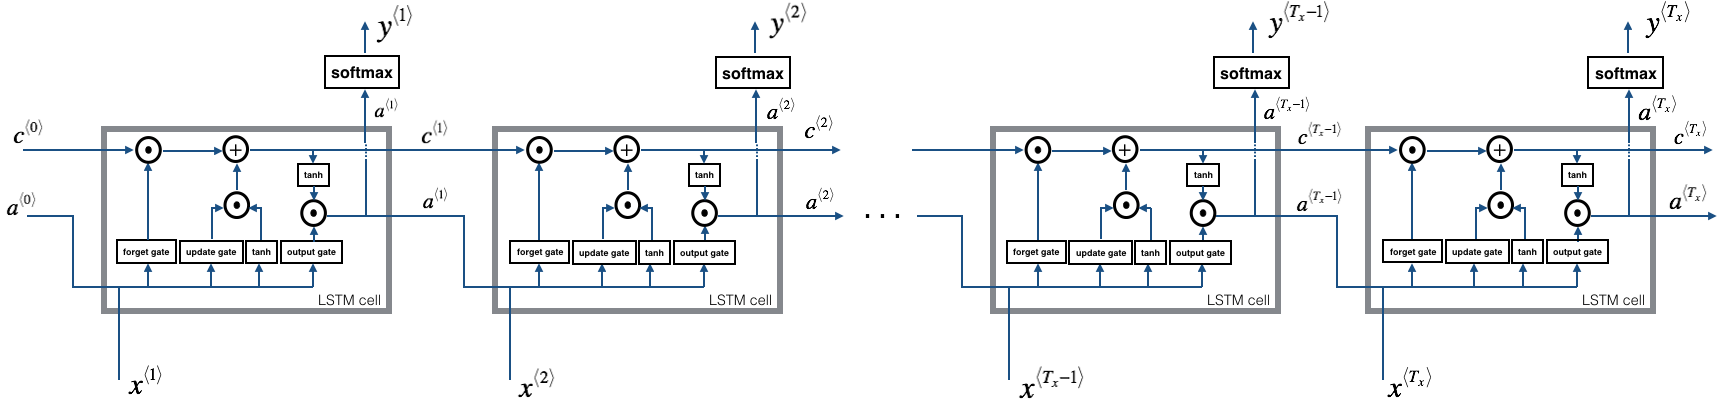

In [19]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: lstm_forward

def lstm_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network using an LSTM-cell described in Figure (4).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wf -- Weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        bf -- Bias of the forget gate, numpy array of shape (n_a, 1)
                        Wi -- Weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        bi -- Bias of the update gate, numpy array of shape (n_a, 1)
                        Wc -- Weight matrix of the first "tanh", numpy array of shape (n_a, n_a + n_x)
                        bc -- Bias of the first "tanh", numpy array of shape (n_a, 1)
                        Wo -- Weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        bo -- Bias of the output gate, numpy array of shape (n_a, 1)
                        Wy -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
                        
    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    c -- The value of the cell state, numpy array of shape (n_a, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of all the caches, x)
    """

    # Initialize "caches", which will track the list of all the caches
    caches = []
    
    ### START CODE HERE ###
    Wy = parameters['Wy'] # saving parameters['Wy'] in a local variable in case students use Wy instead of parameters['Wy']
    # Retrieve dimensions from shapes of x and parameters['Wy'] (≈2 lines)
    n_x, m, T_x = x.shape
    n_y, n_a = Wy.shape
    
    # initialize "a", "c" and "y" with zeros (≈3 lines)
    a = np.zeros((n_a, m, T_x))
    c = np.zeros((n_a, m, T_x))
    y = np.zeros((n_y, m, T_x))
    
    # Initialize a_next and c_next (≈2 lines)
    a_next = a0
    c_next = c[:,:,0]
    
    # loop over all time-steps
    for t in range(T_x):
        # Get the 2D slice 'xt' from the 3D input 'x' at time step 't'
        xt = x[:,:,t]
        # Update next hidden state, next memory state, compute the prediction, get the cache (≈1 line)
        a_next, c_next, yt, cache = lstm_cell_forward(xt, a_next, c_next, parameters)
        # Save the value of the new "next" hidden state in a (≈1 line)
        a[:,:,t] = a_next
        # Save the value of the next cell state (≈1 line)
        c[:,:,t]  = c_next
        # Save the value of the prediction in y (≈1 line)
        y[:,:,t] = yt
        # Append the cache into caches (≈1 line)
        caches.append(cache)
        
    ### END CODE HERE ###
    
    # store values needed for backward propagation in cache
    caches = (caches, x)

    return a, y, c, caches

In [20]:
np.random.seed(1)
x_tmp = np.random.randn(3, 10, 7)
a0_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Wf'] = np.random.randn(5, 5 + 3)
parameters_tmp['bf'] = np.random.randn(5, 1)
parameters_tmp['Wi'] = np.random.randn(5, 5 + 3)
parameters_tmp['bi']= np.random.randn(5, 1)
parameters_tmp['Wo'] = np.random.randn(5, 5 + 3)
parameters_tmp['bo'] = np.random.randn(5, 1)
parameters_tmp['Wc'] = np.random.randn(5, 5 + 3)
parameters_tmp['bc'] = np.random.randn(5, 1)
parameters_tmp['Wy'] = np.random.randn(2, 5)
parameters_tmp['by'] = np.random.randn(2, 1)

a_tmp, y_tmp, c_tmp, caches_tmp = lstm_forward(x_tmp, a0_tmp, parameters_tmp)
print("a[4][3][6] = ", a_tmp[4][3][6])
print("a.shape = ", a_tmp.shape)
print("y[1][4][3] =", y_tmp[1][4][3])
print("y.shape = ", y_tmp.shape)
print("caches[1][1][1] =\n", caches_tmp[1][1][1])
print("c[1][2][1]", c_tmp[1][2][1])
print("len(caches) = ", len(caches_tmp))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

a[4][3][6] =  0.1721177675329167
a.shape =  (5, 10, 7)
y[1][4][3] = 0.9508734618501101
y.shape =  (2, 10, 7)
caches[1][1][1] =
 [ 0.82797464  0.23009474  0.76201118 -0.22232814 -0.20075807  0.18656139
  0.41005165]
c[1][2][1] -0.8555449167181983
len(caches) =  2


- An LSTM is similar to an RNN in that they both use hidden states to pass along information, but an LSTM also uses a cell state, which is like a long-term memory, to help deal with the issue of vanishing gradients.
- An LSTM cell consists of a cell state or long-term memory, a hidden state, or short-term memory, along with 3 gates that constantly update the relevancy of its inputs : 
    - A forget gate, which decides which input units should be remembered and passes along. It's a tensor with values b/w 0 and 1.
        - If a unit has a value close to 0, the LSTM will 'forget' the stored state in the previous cell state.
        - If it has a value close to 1, the LSTM will mostly remember the corresponding value.
    - An update gate, again a tensor containing values b/w 0 and 1. It decides on what information to throw away and what new information to add.
        - When a unit in the update gate is close to 1, the value of its candidate is passes on to the hidden state.
        - When a unit in the update gate is close to 0, it's prevented from being passes onto the hidden state.
    - And an output gate, which decides what gets sent as the output of the time step.